# Super spreader análise

## Compilando os dados das cidades com potencia de super spreader

In [1]:
import pandas as pd

In [2]:
df_municipios = pd.read_csv("../data/integrado/municipio.csv")
df_municipios= df_municipios[df_municipios['latitude'].notna()]

In [41]:
#Carregar arquivos em dataframe
from os import listdir
from os.path import isfile, join
path = "../data/calculado/calculo_spreader/dois"
nome_files = [f for f in listdir(path) if isfile(join(path, f))]



In [42]:
dic_df = {}
for nome_file in nome_files:
    cod_cidade = int(nome_file[-11:-4])
    dic_df[cod_cidade] = pd.read_csv(path+"/"+nome_file)

In [43]:
#Somar três valores: total de caso na cidade, total de casos no restante do pais e total de caso
lista_analise = []

for cod_cidade in dic_df.keys():
    # cod_cidade = 2611606
    df_cidade = dic_df[cod_cidade]
    filtro_cidade = df_cidade["cod_mun"]==cod_cidade
    num_cidade = df_cidade[filtro_cidade]["dia_29"].sum()
    num_espalhamento = df_cidade[~filtro_cidade]["dia_29"].sum()
    num_total = num_cidade + num_espalhamento
    lista_analise.append((cod_cidade, num_cidade, num_espalhamento, num_total))


In [44]:
df_analise = pd.DataFrame(lista_analise, columns=["cod_mun","cidade", "espalhamento", "total"])

In [30]:
df_analise = pd.read_csv("../data/calculado/spreaders_test.csv")


In [31]:
df_analise = df_analise.merge(df_municipios[['cod_mun','nome_mun']], how='left', left_on='cod_mun', right_on='cod_mun')

In [34]:
df_analise.sort_values(by='cidade', ascending=False).head(50)

,cod_mun,cidade,espalhamento,total,nome_mun
3,3106200,43457.255150,3193.631993,46650.887143,Belo Horizonte
5,4106902,42376.851629,4143.353641,46520.205270,Curitiba
10,1302603,40380.681107,5944.117276,46324.798382,Manaus
0,3550308,39905.035775,6988.253160,46893.288935,São Paulo
1,3304557,39219.953821,7632.333495,46852.287316,Rio de Janeiro
13,1501402,39159.916207,7195.257228,46355.173434,Belém
7,2927408,39123.411386,7487.902233,46611.313619,Salvador
9,2304400,38869.924423,7728.243814,46598.168237,Fortaleza
11,5208707,38676.934135,7768.277625,46445.211760,Goiânia
8,2611606,38358.908001,8282.521957,46641.429958,Recife


<AxesSubplot: xlabel='cidade', ylabel='espalhamento'>

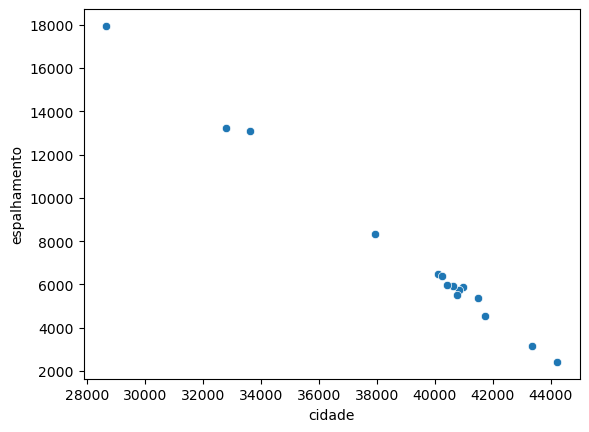

In [28]:
import seaborn as sns
sns.scatterplot(data=df_analise, x="cidade", y="espalhamento")

### Escrever resultado

TODO: Escrever resultado depois de agrupar

In [65]:
#Escrever em csv resultado
# tb_municipio.to_csv("../data/integrado/municipio.csv", index=False)